In [1]:
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from PIL import Image
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#the running of this seperate file needs the revision of relative path
#the path of train label/train img/test label/test img
train_label_path = './Datasets/celeba/labels.csv'
train_img_path = './Datasets/celeba/img/'
test_label_path = './Datasets/celeba_test/labels.csv'
test_img_path = './Datasets/celeba_test/img/'

dataset = pd.read_csv(train_label_path, sep = "\t")  # read csv file
#convert the -1 label to 0
dataset.loc[dataset['smiling'] == -1, 'smiling'] = 0 
y_train = dataset['smiling']
img_name1 = dataset['img_name']

#define the image data preprocessing including resize and conversion to L
def loadImage(path):
    img = Image.open(path)
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)
    median = cv2.resize(img, (45, 55))
    img_resize = Image.fromarray(cv2.cvtColor(median,cv2.COLOR_BGR2RGB))
    img = img_resize.convert("L")
    data = img.getdata()
    return data

#load train image
x_train = []
for name in img_name1:
    img_path = train_img_path + name # get path 
    img = loadImage(img_path)
    x_train.append(img)  # add pic to x_train

# Load test data
data_test = pd.read_csv(test_label_path, sep = "\t")  # read csv file
#convert the -1 label to 0
data_test.loc[data_test['smiling'] == -1, 'smiling'] = 0 
y_test = data_test['smiling']
img_name2 = data_test['img_name']

x_test = []
for name in img_name2:
    img_path = test_img_path + name  # get path
    img = loadImage(img_path)
    x_test.append(img)  # add pic to x_test

#data stardardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print("Dataset prepared")

Dataset prepared


In [3]:
#Build the lositic regresion model
#define sigmoid function
def sigmoid(z):
    sig = 1. / (1. + np.exp(-z))
    return sig

#define the training the model based on gradient descent
def logRegParamEstimates(xTrain, yTrain):
    intercept = np.ones((np.array(xTrain).shape[0], 1))
    xTrain = np.concatenate((intercept, xTrain), axis=1)
    theta = np.zeros(np.array(xTrain).shape[1])    
    for i in range(2100): #epoch
        z = np.dot(xTrain, theta)
        h = sigmoid(z)
        lr = 0.01 #learning rate
        gradient = np.dot(xTrain.T, (h - yTrain)) / (yTrain.shape[0] * np.log(2))
        theta -= lr * gradient
        
    return theta

#prediction function
def logRegrNEWRegrPredict(xTrain, yTrain,xTest):
    theta = logRegParamEstimates(xTrain, yTrain)
    intercept = np.ones((np.array(xTest).shape[0], 1))
    xTest = np.concatenate((intercept, xTest), axis=1)
    sig = sigmoid(np.dot(xTest, theta))
    y_pred1 = sig >= 0.5 # true or false assignment
    return y_pred1

In [4]:
# Cross-validation
'''
for q in range(0,5,1):
    test_size=[0.8,0.6,0.4,0.2,0.05]
    size=test_size[q]
    print("test_size = ",size)
    for p in range(10):
        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size = size)
        y_pred1 = logRegrNEWRegrPredict(x_train_split, y_train_split,x_val)
        y_pred_training = logRegrNEWRegrPredict(x_train_split, y_train_split,x_train_split)
        x=0
        y=0
        k=np.ones((np.array(y_pred1).shape[0]))
        for i in y_pred1:
            if i==True:
                k[x]=1
            elif i==False:
                k[x]=0
            x=x+1
        z=np.ones((np.array(y_pred_training).shape[0]))
        for i in y_pred_training:
            if i==True:
                z[y]=1
            elif i==False:
                z[y]=0
            y=y+1
        print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))
        print('Accuracy Score on test data: ', accuracy_score(y_true=y_val, y_pred=y_pred1))
        
'''

'\nfor q in range(0,5,1):\n    test_size=[0.8,0.6,0.4,0.2,0.05]\n    size=test_size[q]\n    print("test_size = ",size)\n    for p in range(10):\n        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size = size)\n        y_pred1 = logRegrNEWRegrPredict(x_train_split, y_train_split,x_val)\n        y_pred_training = logRegrNEWRegrPredict(x_train_split, y_train_split,x_train_split)\n        x=0\n        y=0\n        k=np.ones((np.array(y_pred1).shape[0]))\n        for i in y_pred1:\n            if i==True:\n                k[x]=1\n            elif i==False:\n                k[x]=0\n            x=x+1\n        z=np.ones((np.array(y_pred_training).shape[0]))\n        for i in y_pred_training:\n            if i==True:\n                z[y]=1\n            elif i==False:\n                z[y]=0\n            y=y+1\n        print(\'Accuracy Score on train data: \', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))\n        print(\'Accuracy Score 

In [5]:
y_pred1 = logRegrNEWRegrPredict(x_train, y_train,x_test)
#print(y_pred1)
x=0
#assign the prediction result as 1 when it is true. Otherwise assign it as 0
k=np.ones((np.array(y_pred1).shape[0]))
for i in y_pred1:
    if i==True:
        k[x]=1
    elif i==False:
        k[x]=0
    x=x+1
    
p=0
for j in range(len(k)):
    a=np.square(k[j]-y_test[j])
    p=p+a
    
MSE=p/len(k)
#print('MSE: '+ str(MSE))
print('Accuracy on test set: '+str(accuracy_score(y_test,k)))
print(classification_report(y_test,k))#text report showing the main classification metrics

Accuracy on test set: 0.88
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       500
           1       0.87      0.89      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



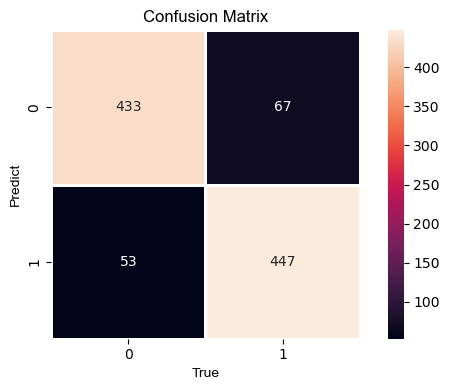

In [6]:
# Results analysis
# Confusion Matrix
cm = confusion_matrix(y_test,k)
df_cm = pd.DataFrame(cm)
fig, ax = plt.subplots(figsize=(6,4)) 
ax = sns.heatmap(df_cm, 
                annot=True, 
                fmt=".20g", 
                linewidths=2, 
                square=True
                )

ax.set_xlabel('True', family='Arial')
ax.set_ylabel('Predict', family='Arial')
ax.set_title('Confusion Matrix', family='Arial')
plt.tight_layout()
plt.savefig('A2_LR.png', dpi=300)
